In [11]:
import cv2 as cv
from matplotlib import pyplot as plt

# Обнаружение лиц каскадными классификаторами
# https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html

face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade  = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

img = cv.imread("./face2.jpg")  
assert img is not None, "Файл не найден."

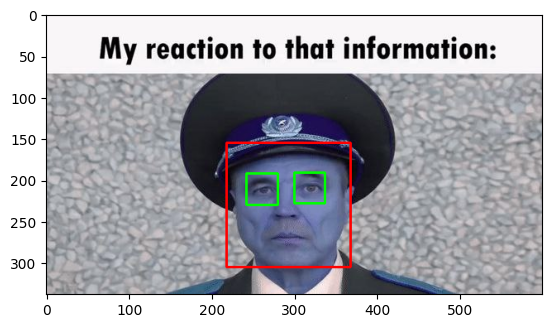

In [12]:
# Преобразуем в оттенки серого
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Обнаруживаем лица
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

for (x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    roi_gray  = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)


plt.imshow(img)